In [ ]:
# Sai Triveni Kottapalli
# ID - C00313481  

# k-Means Clustering

Clustering algorithms aim to identify an optimal division or discrete labeling of groups of points based on the properties of the data.

There are many clustering algorithms available in Scikit-Learn and other libraries, but one of the easiest to understand is *k-means clustering*, which is implemented in `sklearn.cluster.KMeans`.

Let's start with the standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Introducing k-Means

The *k*-means algorithm is designed to identify a predetermined number of clusters within an unlabelled multidimensional dataset. It operates under two fundamental principles regarding optimal clustering:

1. The *cluster center* is defined as the arithmetic mean of all the points that belong to the cluster.
2. Each point is closer to its own cluster center than to the centers of other clusters.

These two principles form the foundation of the *k*-means model. Soon, we will explore the specific steps the algorithm takes to achieve this clustering solution. For now, let's take a look at a simple dataset to observe the results of the *k*-means algorithm.

First, we will generate a two-dimensional dataset containing four distinct blobs. To emphasize the unsupervised nature of this algorithm, we will not include any labels in the visualization.


In [3]:
# changed n_samples=300 to n_samples=200
# plotting scatter plot more efficiently.

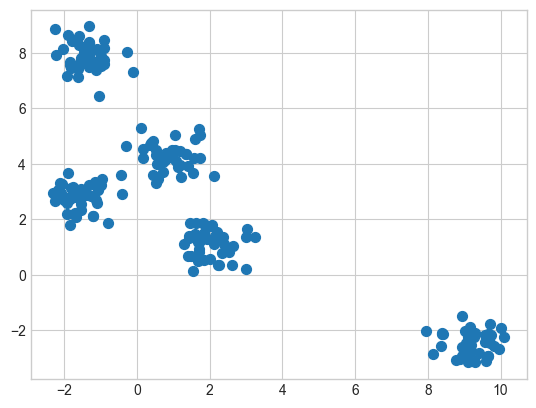

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the five clusters.
The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [5]:
# changed n_clusters=4 to n_clusters=5

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels (the following figure).
We will also plot the cluster centers as determined by the *k*-means estimator:

In [7]:
# plotting the scatter plot more efficiently by adding labels and changing color.

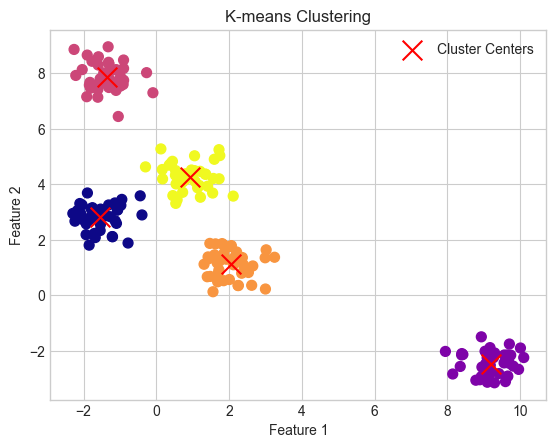

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

The good news is that the *k*-means algorithm, at least in this straightforward case, assigns points to clusters in a way that aligns closely with how we might do it manually. 
You might wonder how this algorithm can find clusters so quickly, especially since the number of possible combinations for cluster assignments grows exponentially with the number of data points. An exhaustive search would be extremely time-consuming and costly. 
Fortunately, an exhaustive search isn't necessary. Instead, the standard approach to *k*-means employs an intuitive iterative method known as *expectation–maximization*.

## Expectation–Maximization

Expectation-maximization (E–M) is a powerful algorithm that is widely used in data science across various contexts. One of its simpler applications is the *k*-means clustering algorithm, which we will briefly discuss here.

The expectation-maximization approach in the context of *k*-means consists of the following steps:

1. Initialize with some cluster centers.
2. Repeat until convergence:
   1. **E-step**: Assign each data point to the nearest cluster center.
   2. **M-step**: Update the cluster centers to be the mean of the points assigned to each cluster.

The **E-step** (expectation step) is named for the process of updating our expectations about which cluster each point belongs to. The **M-step** (maximization step) is named for the process of maximizing a fitness function that determines the locations of the cluster centers. In this case, maximization is achieved by calculating the mean of the data points in each cluster.

Although the literature on this algorithm is extensive, it can be summarized as follows: under typical circumstances, each iteration of the E-step and M-step will yield a better estimate of the characteristics of the clusters.

The k-means algorithm is straightforward enough to implement in just a few lines of code.

In [9]:
# plotting the scatter plot more efficiently by adding labels and changing color.

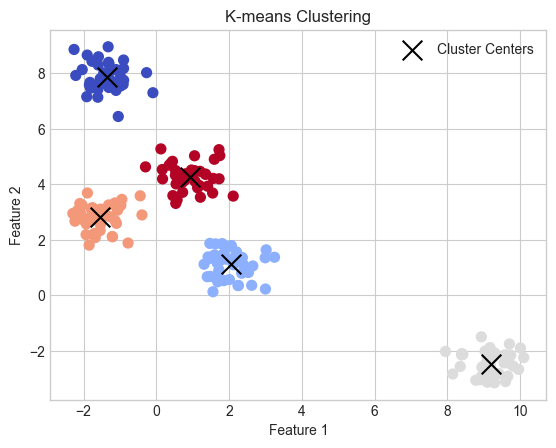

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=42):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)

        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels
centers, labels = find_clusters(X, 5)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='coolwarm')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Most well-tested implementations perform additional tasks behind the scenes, but the function described above 
captures the essence of the expectation-maximization (E-M) approach.

However, there are a few important caveats to keep in mind when using the expectation-maximization algorithm:

#### The globally optimal result may not be achieved
First, while the E-M procedure is guaranteed to improve the result at each step, it does not guarantee that it will reach the *global* optimal solution. For instance, using a different random seed in our simple procedure can lead to different starting guesses that may result in unsatisfactory outcomes (see the following figure).

In [11]:
# plotting the scatter plot more efficiently by changing cmap.

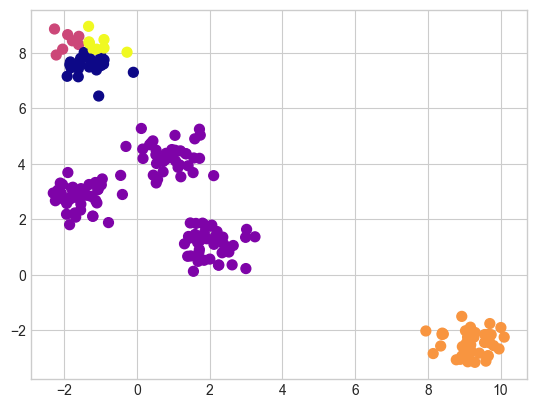

In [12]:
centers, labels = find_clusters(X, 5, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='plasma');

The E-M approach has converged, but it has not achieved a globally optimal configuration. For this reason, it is common practice to run the algorithm with multiple starting guesses. Scikit-Learn does this by default, using the `n_init` parameter, which is set to 10.

#### The number of clusters must be selected beforehand
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters, as shown in Figure 47-6:

In [13]:
# plotting the scatter plot more efficiently by changing cmap.

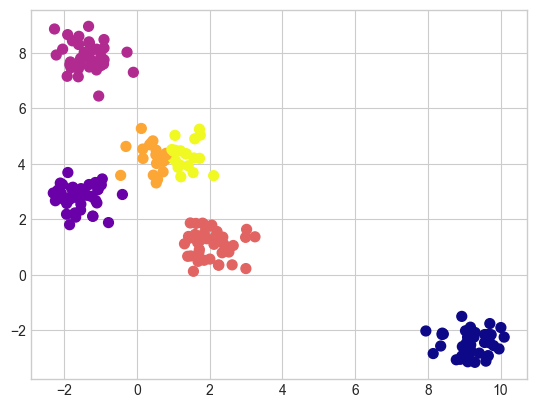

In [14]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='plasma');

Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive, but that we won't discuss further here, is called [silhouette analysis].

#### k-means is limited to linear cluster boundaries
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach (see the following figure):

In [15]:
# changed 200, noise=.05 to 100, noise=.04
# changed s=50, cmap='viridis' to s=60, cmap='coolwarm'

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(100, noise=.04, random_state=0)

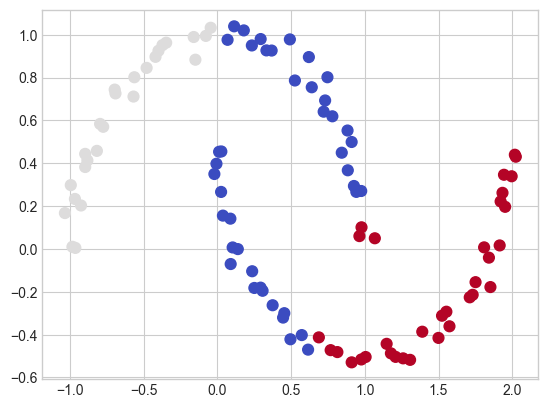

In [20]:
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=60, cmap='coolwarm');

This situation is reminiscent of the discussion in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb), where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible.
We might imagine using the same trick to allow *k*-means to discover non-linear boundaries.

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm (see the following figure):

In [21]:
# plotting the scatter plot more efficiently by changing cmap.

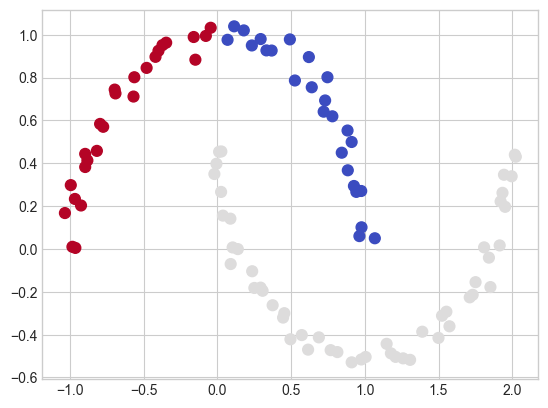

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=60, cmap='coolwarm');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

#### k-means can be slow for large numbers of samples
Because each iteration of *k*-means needs to access every point in the dataset, the algorithm can become relatively slow as the number of samples increases. 
You might wonder if this requirement to use all the data in each iteration can be relaxed. For example, using just a subset of the data to update the cluster centers at each step could be an option. This concept is the basis of batch-based *k*-means algorithms, one of which is implemented in `sklearn.cluster.MiniBatchKMeans`. The interface for this is the same as that of the standard `KMeans`, and we will explore an example of its use as we continue our discussion.

## Examples

Being careful about these limitations of the algorithm, we can use *k*-means to our advantage in a variety of situations.
We'll now take a look at a couple of examples.

### Example 1: k-Means on Iris Dataset

We will start by loading the dataset, then find the clusters.

Silhouette Score: 0.55


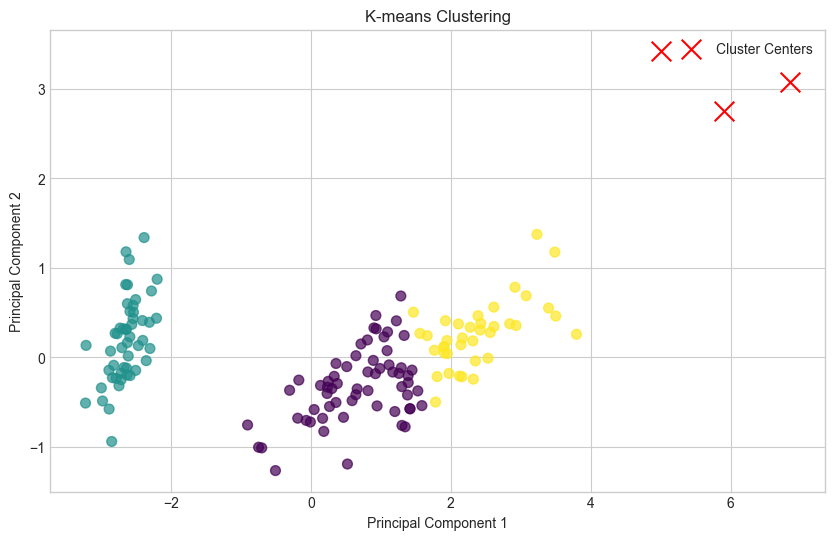

In [23]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculating the Silhouette Score to measure clustering quality
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ploting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### Example 2: k-Means for Color Compression

One interesting application of clustering is in color compression within images.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn `datasets` module:

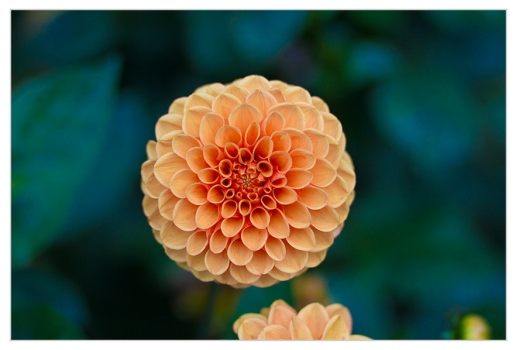

In [24]:
from sklearn.datasets import load_sample_image
flower= load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

The image itself is stored in a three-dimensional array of size `(height, width, RGB)`, containing red/blue/green contributions as integers from 0 to 255:

In [25]:
flower.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1:

In [26]:
data = flower / 255.0 
data = data.reshape(-1, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [27]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Plotting Red vs Green, Red vs Blue, and Green vs Blue
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    scatter1 = ax[0].scatter(R, G, c=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green')
    ax[0].set_title("Red vs Green")

    scatter2 = ax[1].scatter(R, B, c=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue')
    ax[1].set_title("Red vs Blue")

    scatter3 = ax[2].scatter(G, B, c=colors, marker='.')
    ax[2].set(xlabel='Green', ylabel='Blue')
    ax[2].set_title("Green vs Blue")

    # Automatically adjust the limits based on data
    for axis in ax:
        axis.set_xlim(data[:, 0].min(), data[:, 0].max())
        axis.set_ylim(data[:, 1].min(), data[:, 1].max())

    # Add a color bar for reference
    cbar = fig.colorbar(scatter1, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1)
    cbar.set_label("Color Intensity")

    fig.suptitle(title, size=20)
    plt.show()

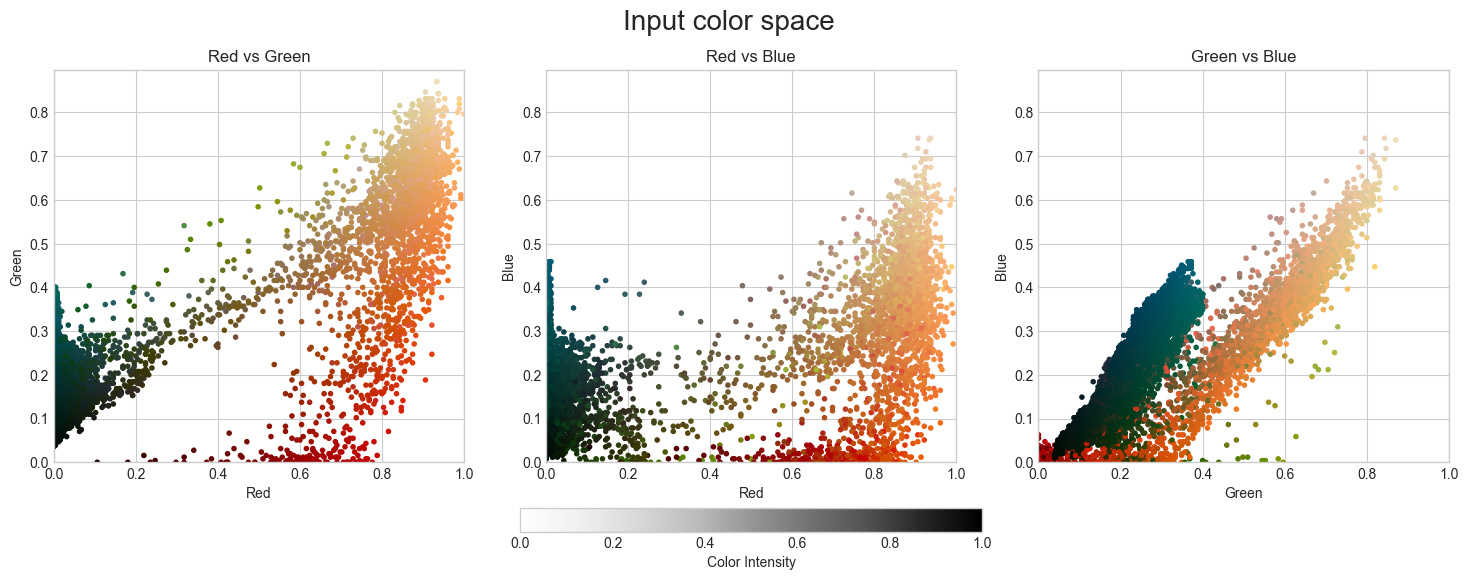

In [28]:
plot_pixels(data, title='Input color space')

Now let's reduce these 16 million colors to just 16 colors, using a *k*-means clustering across the pixel space.
Because we are dealing with a very large dataset, we will use the mini-batch *k*-means, which operates on subsets of the data to compute the result (shown in the following figure) much more quickly than the standard *k*-means algorithm:

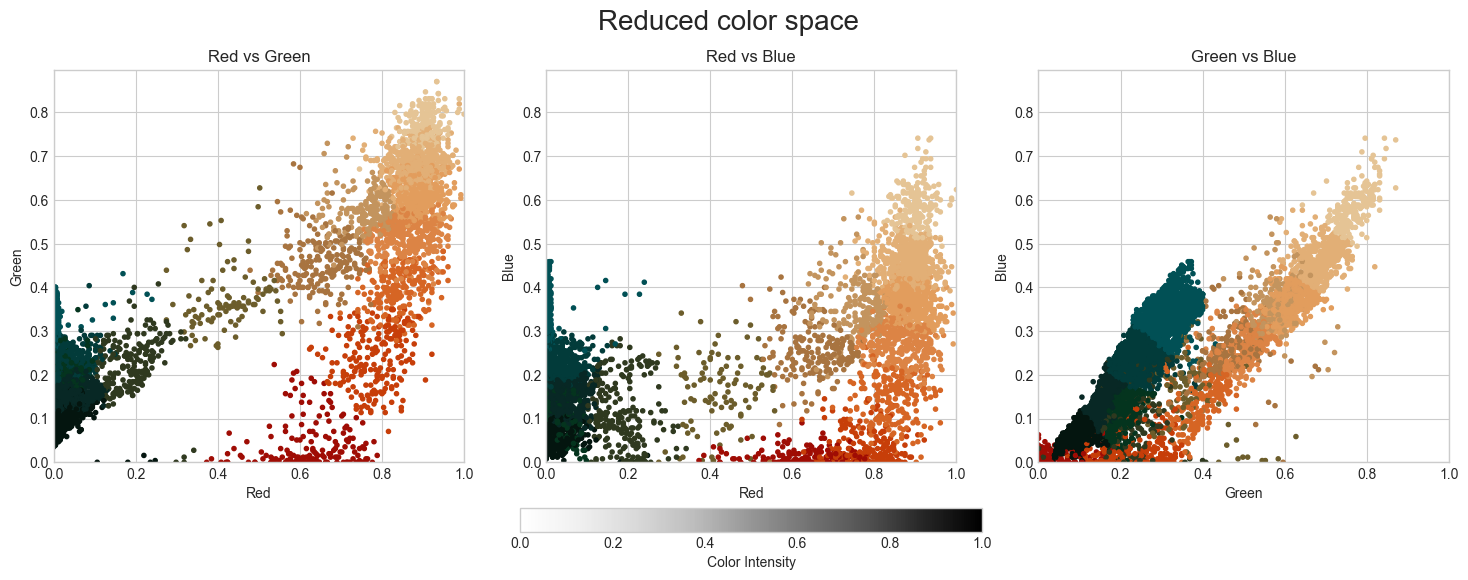

In [29]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space")

The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

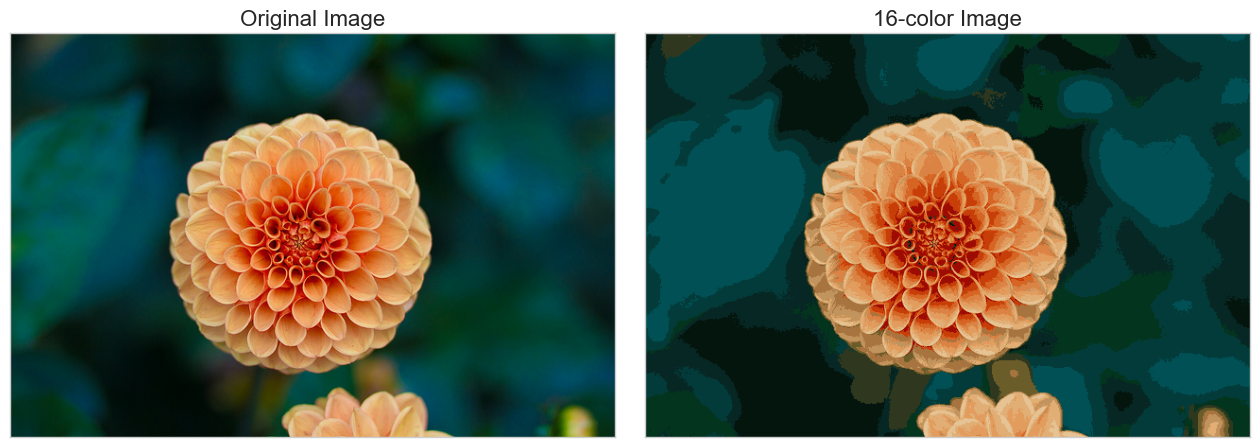

In [30]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);